# To build a model for training and testing:

In [19]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [20]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
dir_name_train_Apple___Apple_scab = 'dataset/train/Apple___Apple_scab'
dir_name_train_Apple___healthy = 'dataset/train/Apple___healthy'

dir_name_train_Tomato___Early_blight = 'dataset/train/Tomato___Early_blight'
dir_name_train_Tomato___healthy = 'dataset/train/Tomato___healthy'

dir_name_train_Strawberry___healthy = 'dataset/train/Strawberry___healthy'
dir_name_train_Strawberry___Leaf_scorch = 'dataset/train/Strawberry___Leaf_scorch'

dir_name_train_Potato___healthy = 'dataset/train/Potato___healthy'
dir_name_train_Potato___Late_blight = 'dataset/train/Potato___Late_blight'

dir_name_train_Corn_maize___healthy = 'dataset/train/Corn_(maize)___healthy'
dir_name_train_Corn_maize___Northern_Leaf_Blight = 'dataset/train/Corn_(maize)___Northern_Leaf_Blight'


In [23]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [24]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for Apple___Apple_scab type disease:

 ====== Images in:  dataset/train/Apple___Apple_scab
images_count:	176
min_width:	256
max_width:	256
min_height:	256
max_height:	256



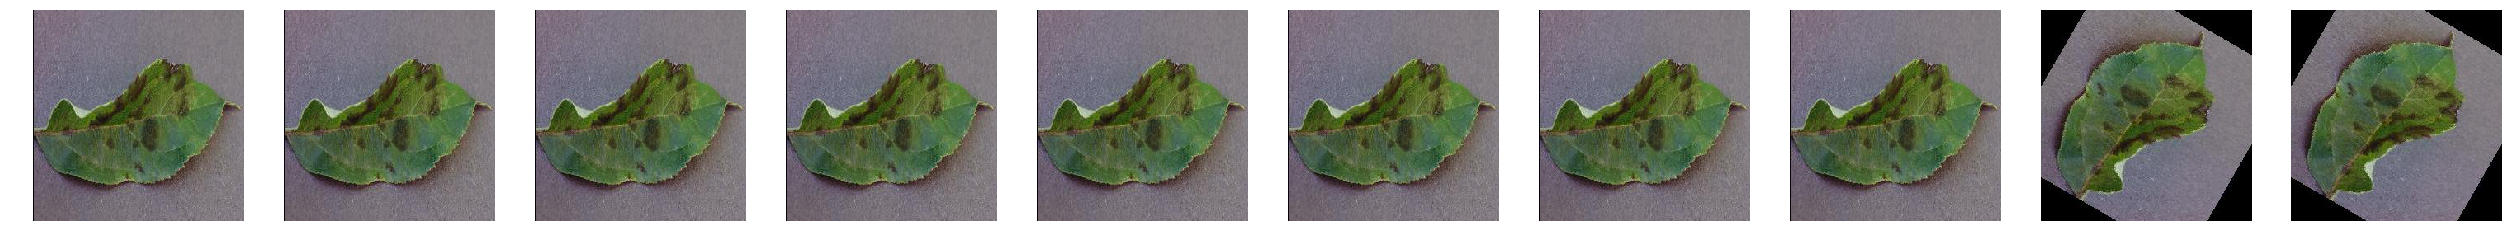

In [25]:
print("")
print("Trainned data for Apple___Apple_scab type disease:")
print("")
Images_details(dir_name_train_Apple___Apple_scab)
print("")
plot_images(dir_name_train_Apple___Apple_scab, 10)


Trainned data for Apple___healthy:

 ====== Images in:  dataset/train/Apple___healthy
images_count:	176
min_width:	256
max_width:	256
min_height:	256
max_height:	256



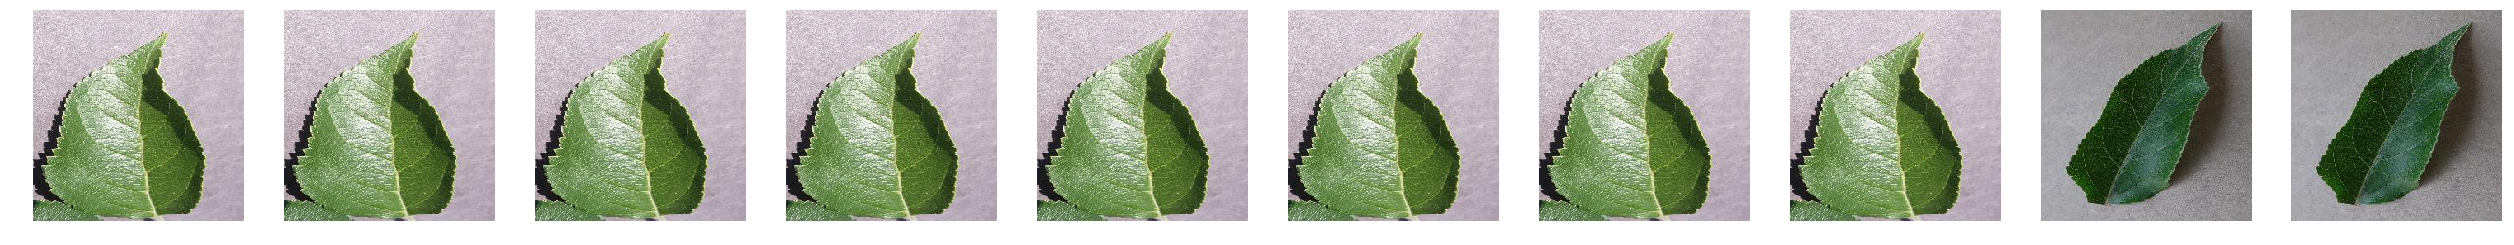

In [26]:
print("")
print("Trainned data for Apple___healthy:")
print("")
Images_details(dir_name_train_Apple___healthy)
print("")
plot_images(dir_name_train_Apple___healthy, 10)


Trainned data for Tomato___Early_blight type disease:

 ====== Images in:  dataset/train/Tomato___Early_blight
images_count:	176
min_width:	256
max_width:	256
min_height:	256
max_height:	256



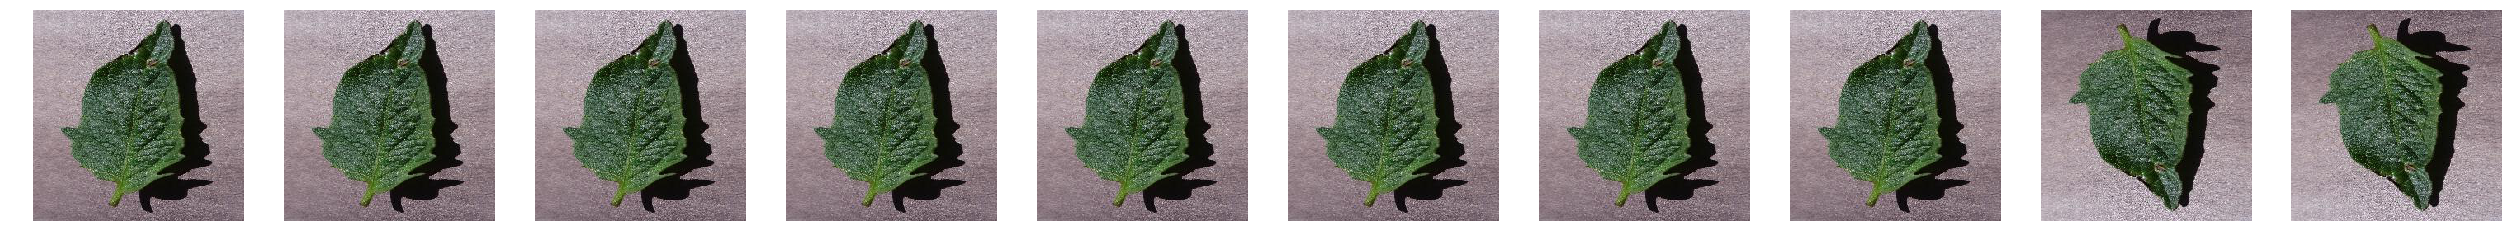

In [27]:
print("")
print("Trainned data for Tomato___Early_blight type disease:")
print("")
Images_details(dir_name_train_Tomato___Early_blight)
print("")
plot_images(dir_name_train_Tomato___Early_blight, 10)


Trainned data for Tomato___healthy:

 ====== Images in:  dataset/train/Tomato___healthy
images_count:	176
min_width:	256
max_width:	256
min_height:	256
max_height:	256



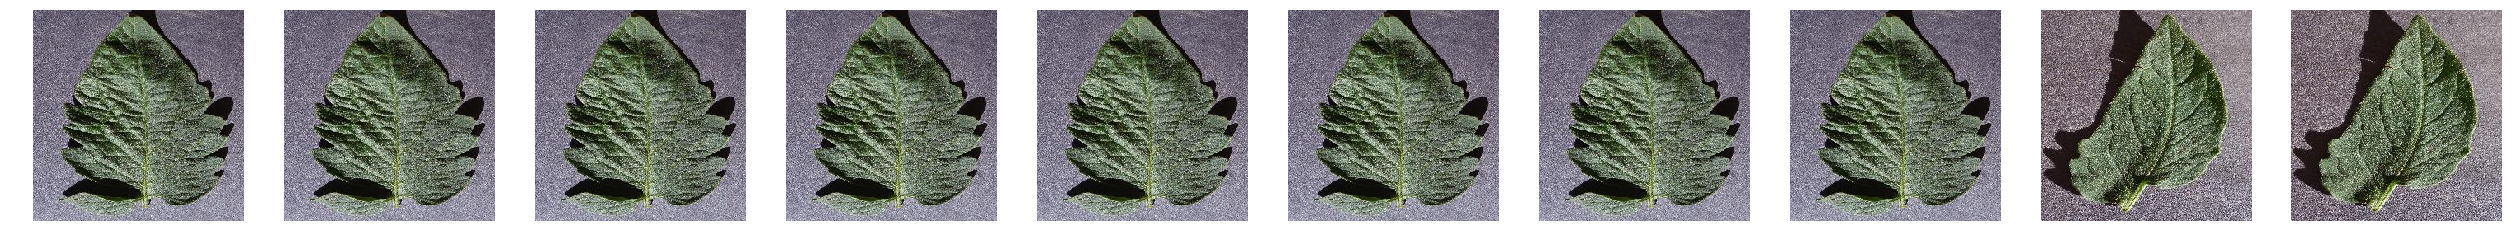

In [28]:
print("")
print("Trainned data for Tomato___healthy:")
print("")
Images_details(dir_name_train_Tomato___healthy)
print("")
plot_images(dir_name_train_Tomato___healthy, 10)


Trainned data for Strawberry___Leaf_scorch type disease:

 ====== Images in:  dataset/train/Strawberry___Leaf_scorch
images_count:	176
min_width:	256
max_width:	256
min_height:	256
max_height:	256



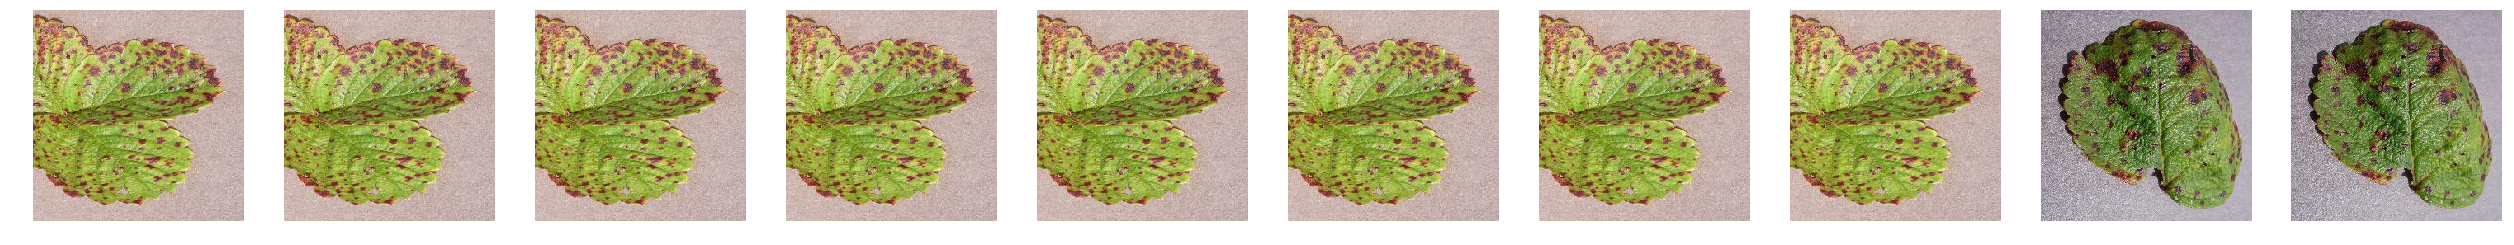

In [29]:
print("")
print("Trainned data for Strawberry___Leaf_scorch type disease:")
print("")
Images_details(dir_name_train_Strawberry___Leaf_scorch)
print("")
plot_images(dir_name_train_Strawberry___Leaf_scorch, 10)


Trainned data for Strawberry___healthy:

 ====== Images in:  dataset/train/Strawberry___healthy
images_count:	176
min_width:	256
max_width:	256
min_height:	256
max_height:	256



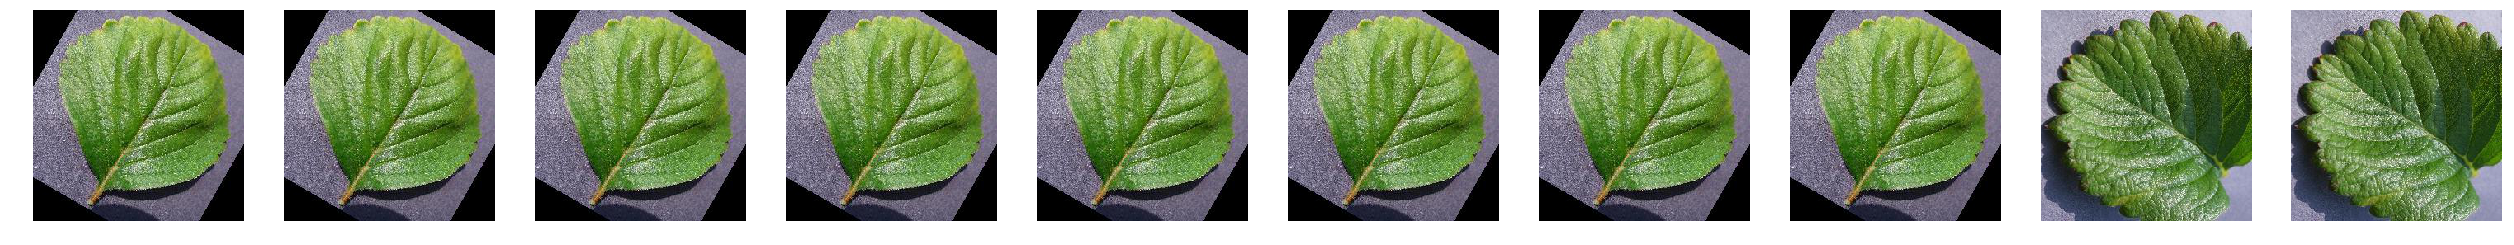

In [30]:
print("")
print("Trainned data for Strawberry___healthy:")
print("")
Images_details(dir_name_train_Strawberry___healthy)
print("")
plot_images(dir_name_train_Strawberry___healthy, 10)

In [31]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [32]:
Classifier.add(Dense(38, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [34]:
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(128,128),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/valid',target_size=(128,128),batch_size=32,class_mode='categorical')

Found 6688 images belonging to 38 classes.
Found 6688 images belonging to 38 classes.


In [35]:
img_dims = 150
epochs = 5
batch_size = 4

In [36]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/5
1672/1672 [==============================] - 1279s 765ms/step - loss: 1.4624 - acc: 0.6160 - val_loss: 0.1564 - val_acc: 0.9677
Epoch 2/5
1672/1672 [==============================] - 1019s 610ms/step - loss: 0.1683 - acc: 0.9523 - val_loss: 0.0387 - val_acc: 0.9916
Epoch 3/5
1672/1672 [==============================] - 936s 560ms/step - loss: 0.0713 - acc: 0.9799 - val_loss: 0.0670 - val_acc: 0.9761
Epoch 4/5
1672/1672 [==============================] - 877s 525ms/step - loss: 0.0475 - acc: 0.9863 - val_loss: 0.0162 - val_acc: 0.9952
Epoch 5/5
1672/1672 [==============================] - 846s 506ms/step - loss: 0.0400 - acc: 0.9892 - val_loss: 0.0114 - val_acc: 0.9940


In [37]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

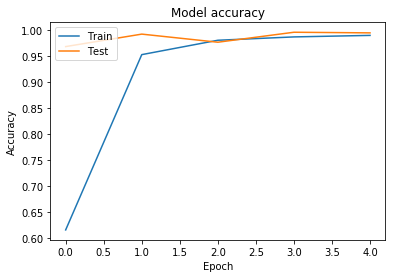

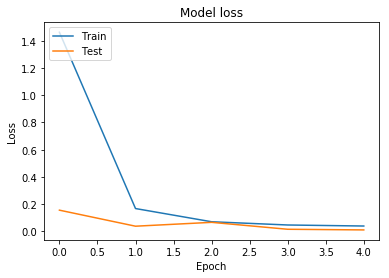

In [38]:
graph()